In [17]:
from gradient_errors import Environment
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

In [2]:
env = Environment('data_normal.xlsx')

D:\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


In [52]:
Qs = []
Rs = []
sRs = []
sQs = []

for i in range(len(env.Ts.T)):
    U = getattr(env, 'T_' + str(int(env.Ts.T[i].item()))).U
    I = getattr(env, 'T_' + str(int(env.Ts.T[i].item()))).I
    
    
    Qs.append(U * I)
    Rs.append(U / I)
    sR_, sQ_ = env.get_err_bars(Rs[-1], Qs[-1])
    sRs.append(sR_)
    sQs.append(sQ_)
    env.chi2(Qs[-1], Rs[-1], {'a': f'R0{i + 1}', 'b': f'beta{i + 1}'}, auto_reverse=False)
    
    dict_df = {'$U$, В': list(map(str, U.detach().numpy())), 
           '$I$, A': list(map(str, I.detach().numpy())),
            '$Q$, Вт': [str(round(_.item(), 5)) for _ in Qs[-1]],
          '$R$, Ом': [str(round(_.item(), 3)) for _ in Rs[-1]],
              '$\sigma Q$, Вт $\cdot 10^{-6}$': [str(round(_*10**6, 0)) for _ in sQs[-1]],
              '$\sigma R$, Ом': [str(round(_, 3)) for _ in sRs[-1]]}
    df = pd.DataFrame.from_dict(dict_df)
    print(df.style.to_latex())

\begin{tabular}{lllllll}
 & $U$, В & $I$, A & $Q$, Вт & $R$, Ом & $\sigma Q$, Вт $\cdot 10^{-6}$ & $\sigma R$, Ом \\
0 & 0.2658 & 0.013186999999999999 & 0.00351 & 20.156 & 3.0 & 0.017 \\
1 & 0.5277 & 0.026102 & 0.01377 & 20.217 & 6.0 & 0.009 \\
2 & 0.7959 & 0.0391678 & 0.03117 & 20.32 & 9.0 & 0.006 \\
3 & 1.1636 & 0.056748 & 0.06603 & 20.505 & 13.0 & 0.004 \\
4 & 1.4514 & 0.0701 & 0.10174 & 20.705 & 16.0 & 0.003 \\
5 & 1.7358 & 0.08294 & 0.14397 & 20.928 & 19.0 & 0.003 \\
6 & 2.0635 & 0.09720999999999999 & 0.20059 & 21.227 & 23.0 & 0.002 \\
7 & 2.3684 & 0.10994 & 0.26038 & 21.543 & 26.0 & 0.002 \\
\end{tabular}

\begin{tabular}{lllllll}
 & $U$, В & $I$, A & $Q$, Вт & $R$, Ом & $\sigma Q$, Вт $\cdot 10^{-6}$ & $\sigma R$, Ом \\
0 & 0.2849 & 0.013779999999999999 & 0.00393 & 20.675 & 3.0 & 0.017 \\
1 & 0.5684 & 0.02743 & 0.01559 & 20.722 & 6.0 & 0.008 \\
2 & 0.8556 & 0.04108 & 0.03515 & 20.828 & 9.0 & 0.006 \\
3 & 1.1502 & 0.05484000000000001 & 0.06308 & 20.974 & 13.0 & 0.004 \\
4 & 1.450

In [4]:
R0s = [env.R01, env.R02, env.R03, env.R04, env.R05, env.R06, env.R07]
betas = [env.beta1, env.beta2, env.beta3, env.beta4, env.beta5, env.beta6, env.beta7]

In [69]:
print(pd.DataFrame.from_dict({
    '$T$, \\textcelsius': map(str, env.Ts.T.detach().numpy()),
    '$R_0$, Ом': [str(round(_.item(), 3)) for _ in R0s],
    '$\\beta$, $\\frac{\\textrm{Ом}}{\\textrm{Вт}}$': [str(round(_.item(), 2)) for _ in betas],
    '\sigma R_0': [str(round(_.item(), 3)) for _ in env.get_error(R0s)],
    '\sigma \\beta': [str(round(_.item(), 2)) for _ in env.get_error(betas)]
}).style.to_latex())

\begin{tabular}{llllll}
 & $T$, \textcelsius & $R_0$, Ом & $\beta$, $\frac{\textrm{Ом}}{\textrm{Вт}}$ & \sigma R_0 & \sigma \beta \\
0 & 23.0 & 20.157 & 5.33 & 0.003 & 0.01 \\
1 & 30.0 & 20.646 & 5.27 & 0.003 & 0.01 \\
2 & 40.0 & 21.355 & 5.11 & 0.004 & 0.02 \\
3 & 50.0 & 22.064 & 4.97 & 0.004 & 0.03 \\
4 & 60.0 & 22.777 & 4.84 & 0.004 & 0.02 \\
5 & 70.0 & 23.489 & 4.69 & 0.005 & 0.03 \\
6 & 80.0 & 24.203 & 4.55 & 0.007 & 0.04 \\
\end{tabular}



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


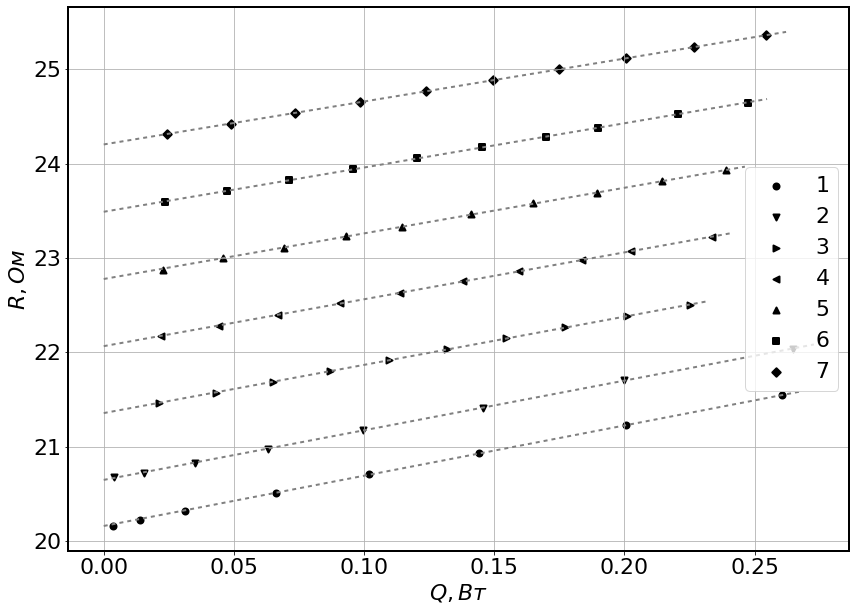

In [5]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

for i in range(7):
    Q, R, sQ, sR = Qs[i].detach().numpy(), Rs[i].detach().numpy(), sQs[i], sRs[i]

    ax.scatter(Q, R, linewidth=2, c='black', marker=markers[i], label=str(i+1))

    X = np.array([min(Q)*0, max(Q)*1.03])
    Y = R0s[i].item() + betas[i].item()*X
    
    ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, 2])
#     ax.errorbar(Q, R, xerr= sQ, yerr=sR, fmt='none', linewidth=2)

    ax.set_xlabel(r"$Q, Вт$")
    ax.set_ylabel(r"$R, Ом$")

ax.legend()
fig.savefig(r'../images/RQ.eps', format='eps')

In [6]:
sR0s, sTs = env.get_err_bars(R0s, env.Ts.T)
env.chi2(env.Ts.T, R0s, {'a': f'R0_abs', 'b': f'alpha'})

Using reversed axis


D:\mipt_edu\2sem\labs\lab1\process\gradient_errors.py:109: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x), torch.tensor(y)


(tensor(18.5169, dtype=torch.float64, requires_grad=True),
 tensor(0.0710, dtype=torch.float64, requires_grad=True))

In [7]:
env.show(env.alpha / env.R0_abs, name = 'normal_alpha')

('3.836', '0.010', -3)

In [8]:
env.show(env.alpha)

('7.103', '0.010', -2)

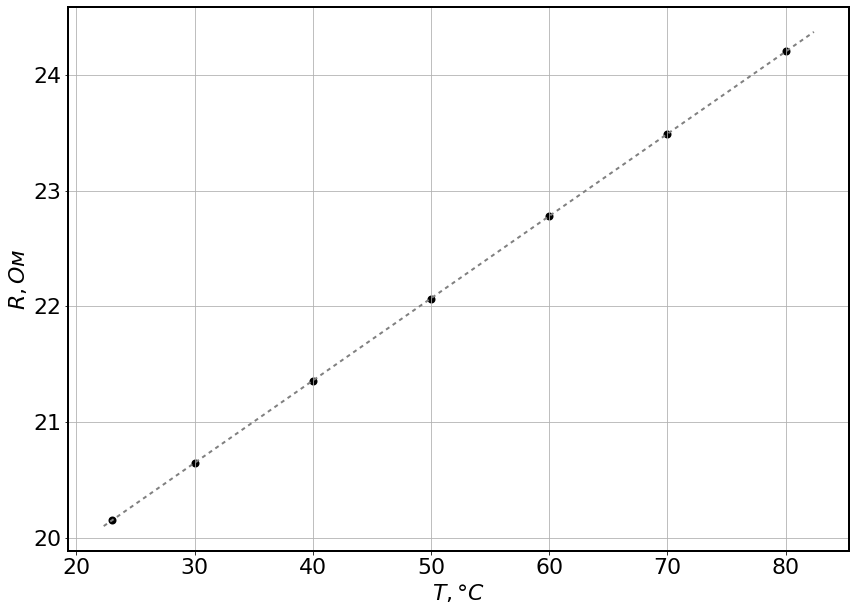

In [9]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

R, T = torch.tensor(R0s).detach().numpy(), env.Ts.T.detach().numpy()

ax.scatter(T, R, linewidth=2, c='black')

X = np.array([min(T)*0.97, max(T)*1.03])
Y = env.R0_abs.item() + env.alpha.item()*X

ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, 2])
# ax.errorbar(T, R, xerr = sTs, yerr = sR0s, fmt='none', linewidth=2)

ax.set_ylabel(r"$R, Ом$")
ax.set_xlabel(r"$T, °C$")
fig.savefig(r'../images/RT.eps', format='eps')

In [10]:
gammas = [env.alpha / beta for beta in betas]
kappas = [gamma / (2 * np.pi * env.L) * torch.log(env.d2/env.d1) for gamma in gammas]

In [11]:
for i, kappa in enumerate(kappas):
    env.show(kappa, name=f'kappa_{i+1}')

In [12]:
env.chi2(env.Ts.T + 273.3, kappas, {'a': f'wqee', 'b': f'A'}, mode='zero')

D:\mipt_edu\2sem\labs\lab1\process\gradient_errors.py:109: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x), torch.tensor(y)


(tensor(0., dtype=torch.float64, requires_grad=True),
 tensor(8.7175e-05, dtype=torch.float64, requires_grad=True))

In [13]:
skappas, sTs = env.get_err_bars(kappas, env.Ts.T)
ln_kappas, ln_T = [torch.log(kappa) for kappa in kappas], torch.log(env.Ts.T + 273.3)

sln_kappas, sln_Ts = env.get_err_bars(ln_kappas, ln_T)
env.chi2(ln_T, ln_kappas, {'a': f'a_', 'b': f'n'})

ln_kappas, ln_T = torch.tensor(ln_kappas).detach().numpy(), ln_T.detach().numpy()
Kappa, T = torch.tensor(kappas).detach().numpy(), env.Ts.T.detach().numpy()

Using reversed axis


In [85]:
print(pd.DataFrame.from_dict({
    '$T$, \\textcelsius': map(str, env.Ts.T.detach().numpy()),
    '\kappa': [str(round(_.item(), 4)) for _ in kappas],
    '\sigma \\kappa': [str(round(_.item(), 4)) for _ in skappas],
    '\ln T': [str(round(_.item(), 4)) for _ in ln_T],
    '\sigma \ln T': [str(round(_.item(), 4)) for _ in sln_Ts],
    '\ln \kappa': [str(round(_.item(), 2)) for _ in ln_kappas],
    '\sigma \ln \kappa': [str(round(_.item(), 2)) for _ in sln_kappas],
}).style.to_latex())

\begin{tabular}{llllllll}
 & $T$, \textcelsius & \kappa & \sigma \kappa & \ln T & \sigma \ln T & \ln \kappa & \sigma \ln \kappa \\
0 & 23.0 & 0.0262 & 0.0004 & 5.6914 & 0.0003 & -3.64 & 0.01 \\
1 & 30.0 & 0.0265 & 0.0004 & 5.7147 & 0.0003 & -3.63 & 0.01 \\
2 & 40.0 & 0.0273 & 0.0004 & 5.7472 & 0.0003 & -3.6 & 0.01 \\
3 & 50.0 & 0.0281 & 0.0004 & 5.7786 & 0.0003 & -3.57 & 0.01 \\
4 & 60.0 & 0.0289 & 0.0004 & 5.809 & 0.0003 & -3.54 & 0.01 \\
5 & 70.0 & 0.0298 & 0.0004 & 5.8386 & 0.0003 & -3.51 & 0.01 \\
6 & 80.0 & 0.0307 & 0.0005 & 5.8673 & 0.0003 & -3.48 & 0.02 \\
\end{tabular}



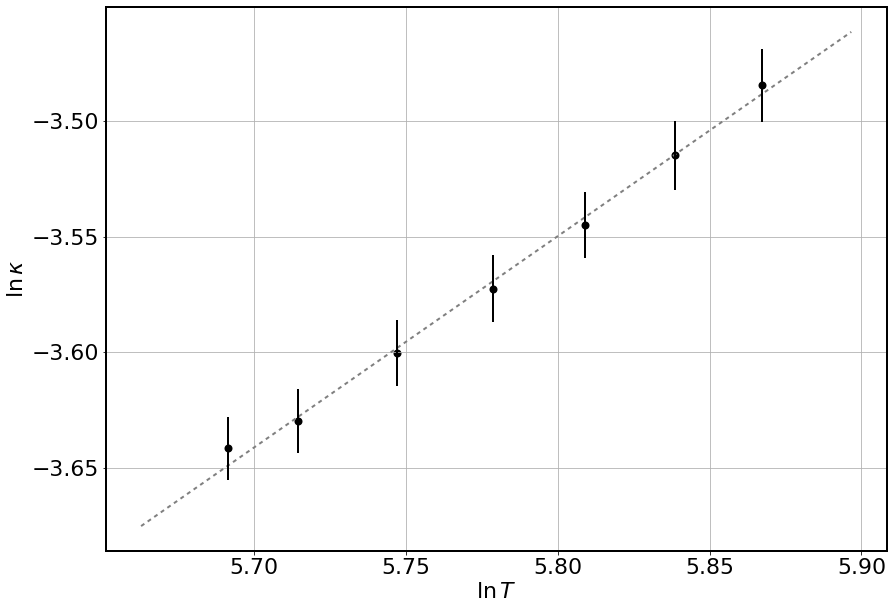

In [14]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

ax.scatter(ln_T, ln_kappas, linewidth=2, c='black')

X = np.array([min(ln_T)*0.995, max(ln_T)*1.005])
Y = env.a_.item() + env.n.item()*X

ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, 2])
ax.errorbar(ln_T, ln_kappas, xerr = sln_Ts, yerr = sln_kappas, fmt='none', linewidth=2, c='black')

ax.set_ylabel(r"$\ln \kappa$")
ax.set_xlabel(r"$\ln T$")
fig.savefig(r'../images/lnkT.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


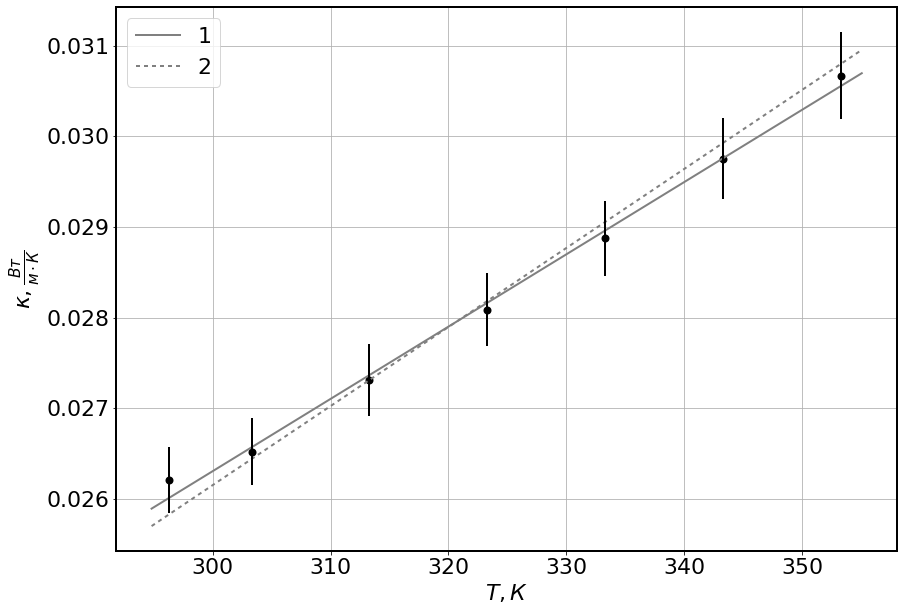

In [15]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

ax.scatter(T + 273.3, Kappa, linewidth=2, c='black')

X = np.array([min(T + 273.3)*0.995, max(T + 273.3)*1.005])
Y = np.e**env.a_.item()*X**env.n.item()

ax.plot(X, Y, linewidth=2, c='gray', label='1')

Y = env.A.item()*X
ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, 2], label='2')
ax.errorbar(T + 273.3, Kappa, xerr = sTs, yerr = skappas, fmt='none', linewidth=2, c='black')

ax.set_ylabel(r"$\kappa, \frac{Вт}{м \cdot К}$")
ax.set_xlabel(r"$T, К$")
ax.legend()
fig.savefig(r'../images/kT.eps', format='eps')

In [16]:
env.show(env.n, name='n')

('9.1', '0.3', -1)